# KNN Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Load and preprocess data
data = pd.read_csv(r"C:\Users\Owner\Downloads\stock_data.csv", skiprows=2)
data.rename(columns={data.columns[0]: 'Date', data.columns[1]: 'Close'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]
data.head()


,Close
Date,
2006-01-05,40.93
2006-01-06,42.88
2006-01-09,43.10
2006-01-10,42.96
2006-01-11,42.19


In [3]:
# Normalize the 'Close' prices to 0-1 range
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=['Close'])

In [4]:
# Create lag features (e.g., use last 5 days to predict next day)
def create_lagged_features(series, lag=5):
    X, y = [], []
    for i in range(lag, len(series)):
        X.append(series[i-lag:i])
        y.append(series[i])
    return np.array(X), np.array(y)

In [5]:
lag = 5
X, y = create_lagged_features(data_scaled['Close'].values, lag)

In [6]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [7]:
# Train KNN model
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [8]:
# Predict and evaluate
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.012320492476516256


In [9]:
# (Optional) Convert predictions back to original scale
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))
# (Optional) Convert predictions back to original scale


# Create Sequences for KNN

In [10]:
# Define function
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])  # Now valid
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Convert to NumPy array first
data_array = data_scaled.values

# Create sequences
window_size = 60
X, y = create_sequences(data_array, window_size)


# Make Predictions and Invert Scaling

In [11]:
# 1. Make predictions using KNN
predictions = knn.predict(X_test)  # shape: (n_samples,)

# 2. Invert scaling (reshape needed for scaler.inverse_transform)
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


# Plot Predictions vs Actual

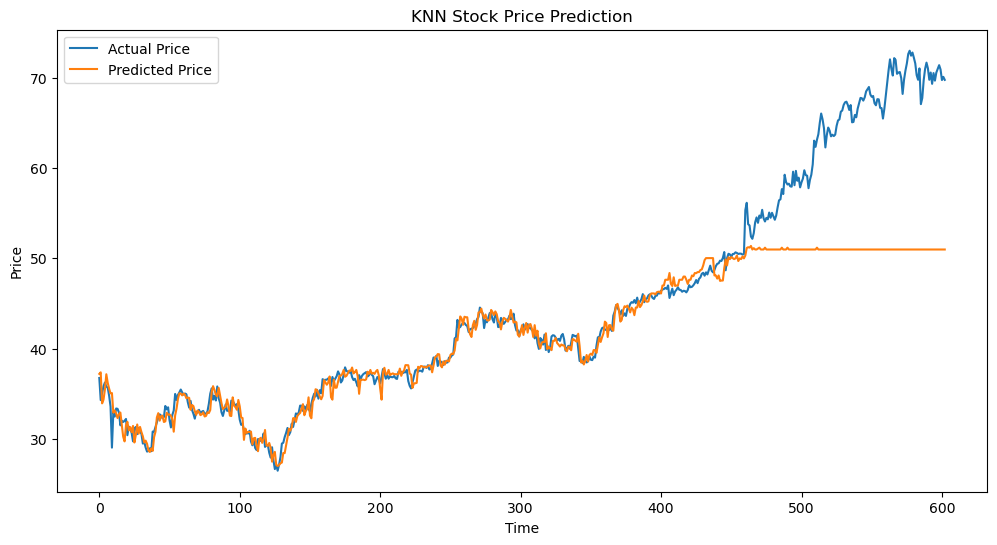

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('KNN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# Evaluation KNN

In [13]:
knn_rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print("KNN RMSE:", knn_rmse)

KNN RMSE: 7.09497386831008


# Summary: KNN Forecasting

1.Trained a K-Nearest Neighbors (KNN) model on AAPL closing prices using a sliding window of the past 60 days as input.
2.The model effectively learned short-term price patterns through distance-based comparison with historical data.
3.Predictions closely followed the actual price trend, with minor lag due to non-parametric nature.
4.KNN RMSE: 7.09, better than Prophet (16.01)